Dataset for Initial Temperature

26.996143724284416


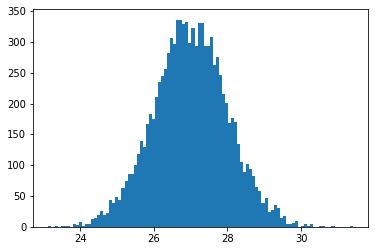

In [1]:
import numpy as np
 
Ini_Temp = np.random.normal(27, 1, 10000)
 

print(np.mean(Ini_Temp))
import matplotlib.pyplot as plt
plt.hist(Ini_Temp, 100)
plt.show()

Dataset for Humidity

60.02557829621268


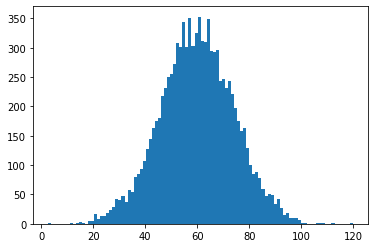

In [2]:
import numpy as np
 
Humidity = np.random.normal(60, 14, 10000)
 

print(np.mean(Humidity))
import matplotlib.pyplot as plt
plt.hist(Humidity, 100)
plt.show()

AQI

73.76739103848519


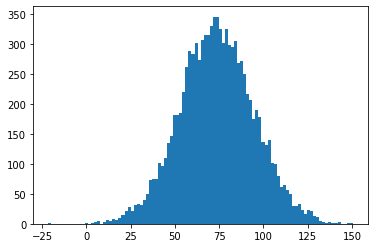

In [3]:
import numpy as np
 
AQI = np.random.normal(74, 21, 10000)
 

print(np.mean(AQI))
import matplotlib.pyplot as plt
plt.hist(AQI, 100)
plt.show()

Pressure

101.33329683348782


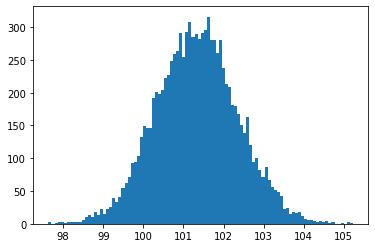

In [4]:
import numpy as np
 
Pressure = np.random.normal(101.325, 1, 10000)
 

print(np.mean(Pressure))
import matplotlib.pyplot as plt
plt.hist(Pressure, 100)
plt.show()

Air Velocity

0.5993962526759635


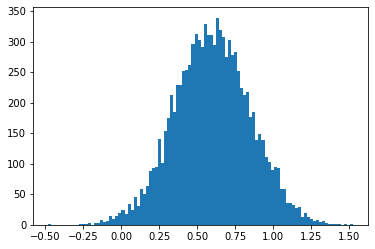

In [5]:
import numpy as np
 
AirVel = np.random.normal(0.6, .25, 10000)
 

print(np.mean(AirVel))
import matplotlib.pyplot as plt
plt.hist(AirVel, 100)
plt.show()

No of people

4.296483486593046


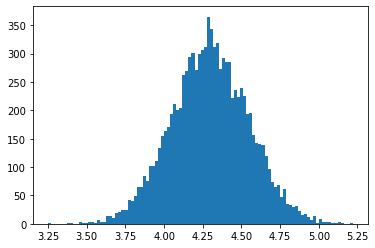

In [6]:
import numpy as np
 
Nofpeop = np.random.normal(4.3, .25, 10000)
 

print(np.mean(Nofpeop))
import matplotlib.pyplot as plt
plt.hist(Nofpeop, 100)
plt.show()

1190.1862109480019


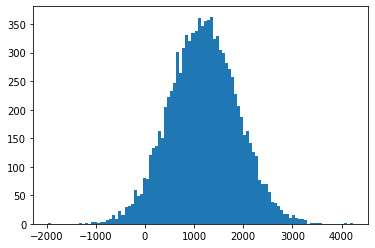

In [7]:
import numpy as np
 
ambL = np.random.normal(1200, 700, 10000)
 

print(np.mean(ambL))
import matplotlib.pyplot as plt
plt.hist(ambL, 100)
plt.show()

19.023128354524054


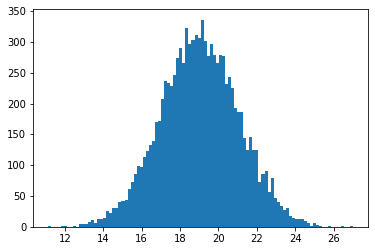

In [13]:
import numpy as np
 
ACTem = np.random.normal(19, 2, 10000)
 

print(np.mean(ACTem))
import matplotlib.pyplot as plt
plt.hist(ACTem, 100)
plt.show()

Room Area

167.9964489324857


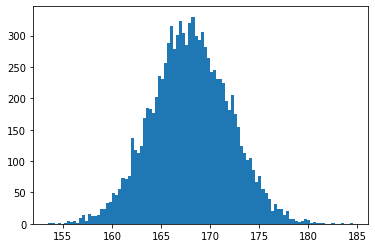

In [18]:
import numpy as np
 
RoomA = np.random.normal(168, 4, 10000)
 

print(np.mean(RoomA))
import matplotlib.pyplot as plt
plt.hist(RoomA, 100)
plt.show()

In [21]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Indec2')

# Open our new sheet and add some data.
worksheet = gc.open('Indec2').sheet1

cell_list = worksheet.range('A2:A10001')
i=0
for cell in cell_list:
  cell.value = round(AirVel[i],2)
  i=i+1

worksheet.update_cells(cell_list) 
 

worksheet.update_cells(cell_list)

######################################################################
cell_list = worksheet.range('B2:B10001')
i=0
 
for cell in cell_list:
  cell.value = round(Ini_Temp[i],2)
  i=i+1

worksheet.update_cells(cell_list)

######################################################################
cell_list = worksheet.range('C2:C10001')
i=0
 
for cell in cell_list:
  cell.value = round(Humidity[i],2)
  i=i+1

worksheet.update_cells(cell_list)

######################################################################
cell_list = worksheet.range('D2:D10001')
i=0
 
for cell in cell_list:
  cell.value = round(ambL[i],2)
  i=i+1

worksheet.update_cells(cell_list)

######################################################################
cell_list = worksheet.range('E2:E10001')
i=0
 
for cell in cell_list:
  cell.value = round(Nofpeop[i],2)
  i=i+1

worksheet.update_cells(cell_list)


######################################################################
cell_list = worksheet.range('G2:G10001')
i=0
for cell in cell_list:
  cell.value = round(Pressure[i],2)
  i=i+1

worksheet.update_cells(cell_list)

######################################################################
cell_list = worksheet.range('F2:F10001')
i=0
for cell in cell_list:
  cell.value = round(AQI[i],2)
  i=i+1
worksheet.update_cells(cell_list)
######################################################################


cell_list = worksheet.range('H2:H10001')
i=0
for cell in cell_list:
  cell.value = round(RoomA[i],2)
  i=i+1

worksheet.update_cells(cell_list) 
######################################################################


cell_list = worksheet.range('I2:I10001')
i=0
for cell in cell_list:
  cell.value = round(ACTem[i],2)
  i=i+1
 
 

worksheet.update_cells(cell_list)

{'spreadsheetId': '18AqbDZ5AlX2tKhOyM-EVb170zxlsC1aiWdj4aBezBmw',
 'updatedCells': 10000,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!I2:I10001',
 'updatedRows': 10000}

In [ ]:
import cv2
import imutils
import numpy as np
import argparse
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import serial
import time
line=[]


ser = serial.Serial('/dev/ttyUSB0', 9600, timeout=1)
ser.reset_input_buffer()
 
# define the scope
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('test1-351715-7960d6a8b040.json', scope)
client = gspread.authorize(creds)
sheet = client.open('test')

# get the first sheet of the Spreadsheet
sheet_instance = sheet.get_worksheet(0)

sheet_runs1 = sheet.get_worksheet(1)

def detect(frame):
    HOGCV = cv2.HOGDescriptor()                 
    HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    bounding_box_cordinates, weights =  HOGCV.detectMultiScale(frame, winStride = (4, 4), padding = (8, 8), scale = 1.03)
    
    person = 1
    for x,y,w,h in bounding_box_cordinates:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(frame, f'person {person}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        person += 1
    
    cv2.putText(frame, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.putText(frame, f'Total Persons : {person-1}', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.imshow('output', frame)
    return person
    

     



frame=cv2.imread('/home/pi/Desktop/indec_google sheets updation/bb')
frame = imutils.resize(frame , width=min(800,frame.shape[1]))
print('Detecting people...')
peop=detect(frame)
 


 
# It is for removing/deleting created GUI window from screen
# and memory
cv2.destroyAllWindows()
i=2
while True:
    if ser.in_waiting > 0:
            indexa='A'+str(i)
            indexb='B'+str(i)
            indexc='C'+str(i)
            line = ser.readline().decode('utf-8').rstrip()
             
            Hum=line[0:5]
            Tem=line[5:10]
            sheet_runs1.update_acell(indexa,str(Hum))
            sheet_runs1.update_acell(indexb,str(Tem))
            sheet_runs1.update_acell(indexc,peop)
            
            i=i+1
            print(Hum)
            time.sleep(10)
